<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [890]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [891]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "3" #@param {type:"string"}
"""Student_ID&Name = "a" #@param {type:"string"}
Student_ID&Name = "b" #@param {type:"string"}
Student_ID&Name = "c" #@param {type:"string"}
Student_ID&Name = "d" #@param {type:"string"}
Student_ID&Name = "e" #@param {type:"string"}"""
#@markdown ---

'Student_ID&Name = "a" #@param {type:"string"}\nStudent_ID&Name = "b" #@param {type:"string"}\nStudent_ID&Name = "c" #@param {type:"string"}\nStudent_ID&Name = "d" #@param {type:"string"}\nStudent_ID&Name = "e" #@param {type:"string"}'

In [892]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Draft" #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [893]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [894]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [895]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# to generate word clouds
from wordcloud import WordCloud

In [896]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# to perform clustering analysis
from sklearn import cluster
from sklearn.metrics import silhouette_score

In [897]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# To use GloVe model
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [898]:
# General work
import os

In [899]:
!pip install gpy

In [900]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [901]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Exploratory Data Analysis

### Train dataset

In [902]:
housePath = ''
is_COLAB = 'google.colab' in str(get_ipython())
if is_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    housePath = '/content/drive/MyDrive/Colab Notebooks/Data/house/'
else:
    housePath = './data/'

In [903]:
# file names
train_file_name = 'HousePrice_Train.csv'
test_file_name = 'HousePrice_Test.csv'

# training dataset: 
training_file = housePath + train_file_name

# test dataset: 
testing_file = housePath + test_file_name

In [904]:
# load train dataset
df_train = pd.read_csv(training_file)
df_train.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [905]:
# show first data frame rows 
df_train.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [906]:
# Generate descriptive statistics
df_train.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


Reviewing the training dataset we can immediately see points of note which require inspection:  
- The maximum longitude of -1.7 degrees is outside of Ireland.
- The maximum number of beds and bathrooms, 27 and 18, are not likely to belong to houses.  
- The maximum surface area is over 400 times the size of the mean.

We remove the **id** and **index** columns before performing further inspection.

In [907]:
df_train.drop(['ID', 'Index'], axis=1, inplace=True)

We view categorical variables.

In [908]:
# Gathering categorical variables although not a guaranteed manner to do it given variables could be numerically encoded. 
numeric_attr = df_train._get_numeric_data().columns
all_attr = df_train.columns
categ_var = list(set(all_attr) - set(numeric_attr))
print(f"Categorical variables: {categ_var}")

Categorical variables: ['BER_class', 'Type', 'Location', 'Services', 'Features', 'Description']


In [909]:
# View detail of the categorical attributes without the text blocks Description and Features
categ_var.remove('Description')
categ_var.remove('Features')

In [910]:
for cat_var in categ_var:
    print(f"-- Attribute: {cat_var}:\n{df_train[cat_var].value_counts()}\n")

-- Attribute: BER_class:
D1                     182
D2                     173
C3                     154
C2                     144
C1                     133
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64

-- Attribute: Type:
semi-detached     458
apartment         431
terraced          299
detached          234
end-of-terrace    118
bungalow           48
duplex             33
townhouse          14
studio              2
site                1
Name: Type, dtype: int64

-- Attribute: Location:
Castleknock      57
Malahide         50
Lucan            49
Rathfarnham      46
Clondalkin       41
                 ..
Brittas           1
Ballymun          1
Kingswood         1
Ard Na Greine     1
Windy Arbour      1
Na

We look for missing data

In [911]:
# Check for number of missing values in original data prior to any transform
df_train.isna().sum()

Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [912]:
# Show percentage of missing values
df_train.isna().sum() * 100 / len(df_train)

Location          0.000000
Num_Bathrooms     0.000000
Num_Beds          0.000000
BER_class        15.323565
Description       0.000000
Services         64.774115
Features          0.000000
Latitude          0.000000
Longitude         0.000000
Type              0.000000
Surface           0.000000
Price             0.000000
dtype: float64

As **Services** is missing 64% of entries it is unlikely to be reliable in telling us much for our dataset. We will remove it. **BER_class** is missing 15% which we will replace with the mode.

In [913]:
df_train.drop(['Services'], axis=1, inplace=True)

BER_mode = df_train.BER_class.mode()[0]
df_train.BER_class.replace(0, BER_mode, inplace=True)

We look at boxplots for outliers:

In [914]:
def plot_multiple_boxplots(dataframe: pd.DataFrame=None, feature_list: list=None) -> None:
    """Plot multiple boxplots for features in a list
    
    Args:
        dataframe: DataFrame from which to pull features provided in feature_list
        feature_list: list, contains string names of features to plot
    Returns:
        None
    """
    fig, axes = plt.subplots(1, len(feature_list))
    for i, col in enumerate(feature_list):
        ax = sns.boxplot(y=dataframe[col], ax=axes.flatten()[i])
        ax.set_ylim(dataframe[col].min(), dataframe[col].max())
        ax.set_ylabel(col)
    fig.set_size_inches(16, 4)
    plt.show()

Numeric variables: Index(['Num_Bathrooms', 'Num_Beds', 'Latitude', 'Longitude', 'Surface',
       'Price'],
      dtype='object')


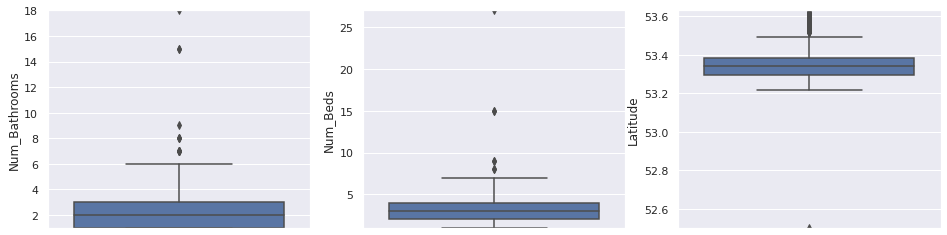

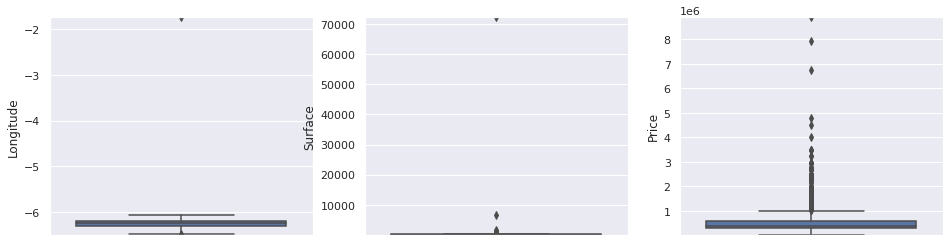

In [915]:
# Select numeric datatypes\
numeric_attr = df_train.select_dtypes(np.number).columns
print(f"Numeric variables: {numeric_attr}")

plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[:3])
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[3:])

We observe that there are very large outliers in **surface**, **Num_Bathrooms**, **Num_Beds** and **Price**.
We'll revivew each in turn. 

In [916]:
df_train.loc[df_train.Num_Bathrooms>12]

,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
557,Inchicore,15,15,D1,umber 67 &amp; 69 Jamestown Road represent a f...,18 separate units\nTransport links including t...,53.335109,-6.331515,semi-detached,318.2,775000
1099,Dun Laoghaire,15,15,NaN,A truly unique stone built house of great qual...,Lift servicing all floors\nVenetian and gothic...,53.287504,-6.146605,detached,700.0,1500000
1378,Killiney,18,27,NaN,The Grove is an imposing Victorian mansion bui...,Approx. 1 490 sq. m / 16 041 sq. ft. of accomm...,53.260955,-6.117266,detached,1490.0,4500000


The buildings with more than 12 bathrooms are the outliers in terms of bedrooms but are not the largest outliers in terms of price or surface. It is possible we could drop these without adversely affecting the model.

In [917]:
df_train.drop(df_train.loc[df_train.Num_Bathrooms>12].index, inplace=True)

In [918]:
df_train.loc[df_train.Longitude>-4]

,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
355,Clondalkin,1,3,NaN,RAY COOKE AUCTIONEERS take great pleasure in i...,None,52.501856,-1.744995,semi-detached,79.0,199000


The property with the longitudinal outlier is also an outlier in latitude. The lat/long equates to Birmingham depiste being listed as Clondalkin. We will drop this outlier.

In [919]:
df_train.drop(df_train.loc[df_train.Longitude>-4].index, inplace=True)

In [920]:
df_train.loc[df_train.Surface>50000]

,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
506,Swords,1,4,E1,Thornton Park is a superb modern equestrian ce...,None,53.474502,-6.343483,bungalow,72236.38714,1100000


The **Description** indicates that this is actually an equestrian centre which explains why the surface area is an outlier. We will drop this property.

In [921]:
df_train.drop(df_train.loc[df_train.Surface>50000].index, inplace=True)

In [922]:
df_train.describe()

,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1.633000e+03
mean,2.030006,3.013472,53.351019,-6.257897,124.240093,5.514738e+05
std,1.087341,1.175137,0.073910,0.091787,186.218564,5.568198e+05
min,1.000000,1.000000,53.215381,-6.497000,3.400000,1.999500e+04
25%,1.000000,2.000000,53.294461,-6.309532,73.000000,2.950000e+05
50%,2.000000,3.000000,53.341667,-6.247821,97.000000,3.950000e+05
75%,3.000000,4.000000,53.382053,-6.194453,135.000000,5.950000e+05
max,9.000000,9.000000,53.630588,-6.054719,6705.000000,8.900000e+06


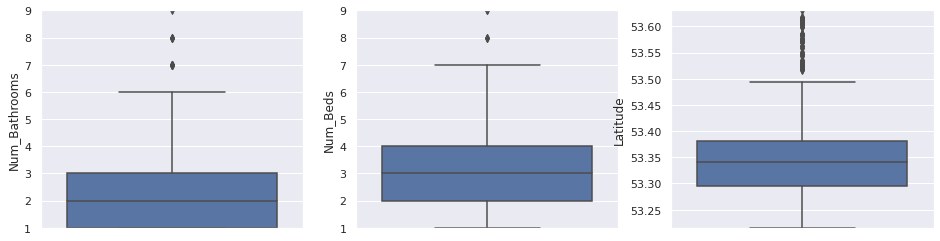

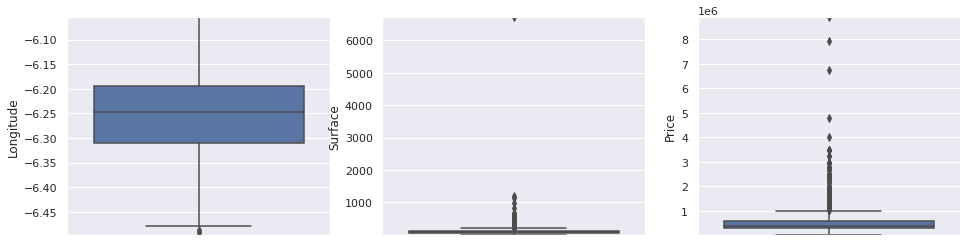

In [923]:
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[:3])
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[3:])

We'll scale the numeric features.

array([[<AxesSubplot:title={'center':'Num_Bathrooms'}>,
        <AxesSubplot:title={'center':'Num_Beds'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Surface'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

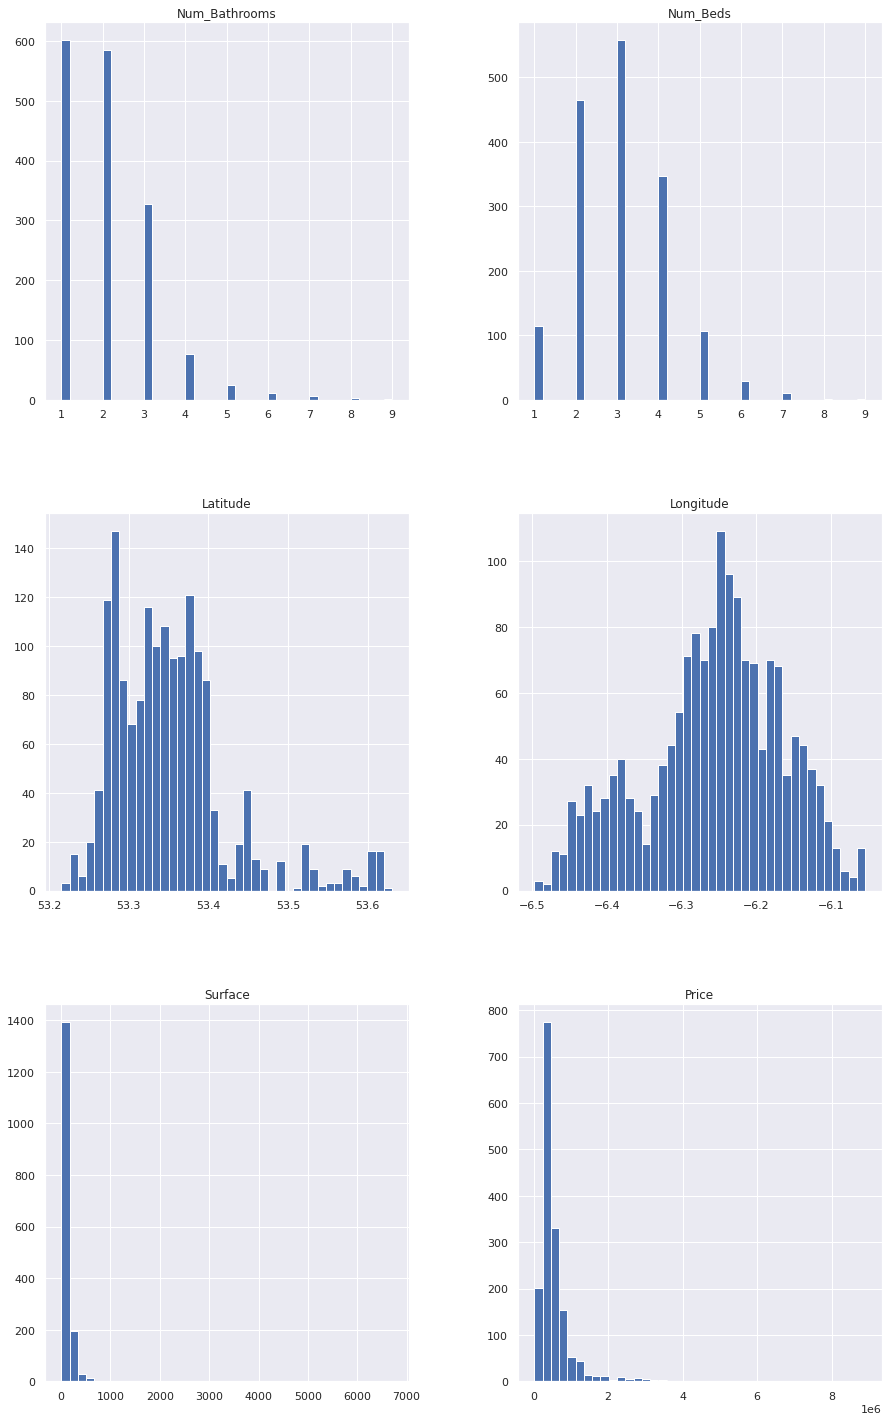

In [924]:
df_train[numeric_attr].hist(bins=40, figsize=[15,25])

**Num_Bathrooms**, **Num_Beds** and **Surface** are skewed. We'll use log transformation these and check if they are less skewed in this representation.

In [925]:
lst = ['Num_Bathrooms', 'Num_Beds', 'Surface']
for var in lst:
    var_min = df_train[var].min()
    df_train[var] = np.log(df_train[var]-var_min+1.0)

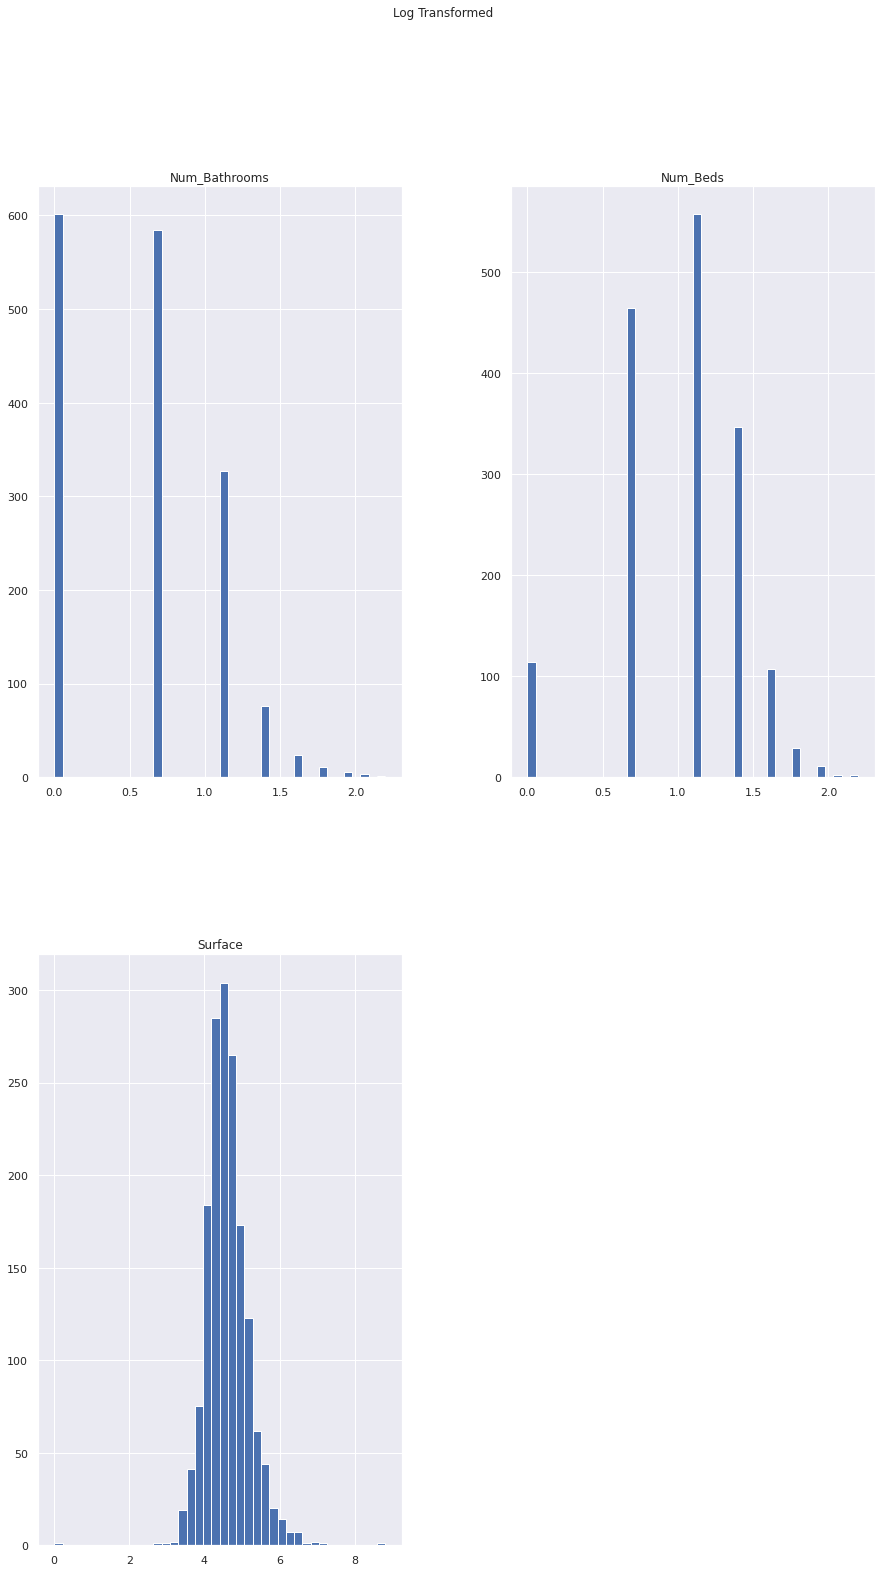

In [926]:
df_train[lst].hist(bins=40, figsize=[15,25])
plt.suptitle('Log Transformed')
plt.show()

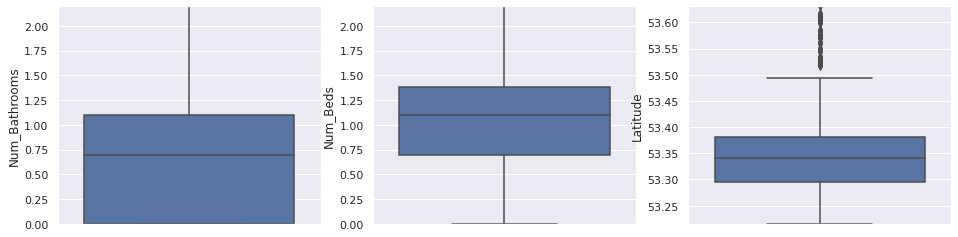

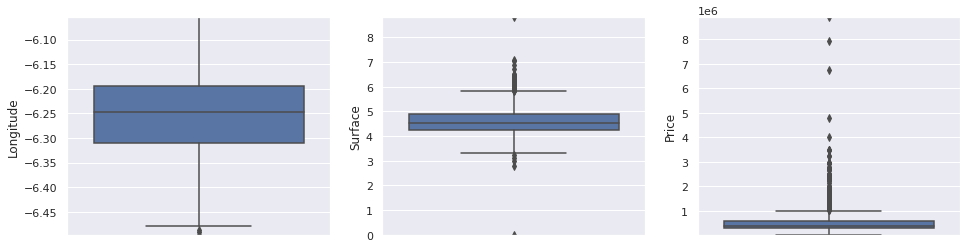

In [927]:
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[:3])
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[3:])

Following log transformation **Num_Bathrooms**, **Num_Beds** and **Surface** look less skewed.


### Encode Categorical Attributes

Our categorical attributes are **BER_class**, **Location** and **Type**. We'll aim to encode appropriately.  

The **BER_class** is an *ordinal* categorical variable. Using publicly available BER rating scale information and the content of the training dataset we produce the following ordinal mapping.

In [928]:
BER_class_mapper = {
    "A1": 0,
    "A2": 1,
    "A3": 2,
    "B1": 3,
    "B2": 4,
    "B3": 5,
    "C1": 6,
    "C2": 7,
    "C3": 8,
    "D1": 9,
    "D2": 10,
    "E1": 11,
    "E2": 12,
    "F": 13,
    "G": 14,
    "SINo666of2006exempt": 15
}

df_train.BER_class = df_train.BER_class.replace(BER_class_mapper)

In [929]:
# We'll update numeric attributes to include BER_class
numeric_attr = df_train.select_dtypes(np.number).columns
print(f"Numeric variables: {numeric_attr}")

Numeric variables: Index(['Num_Bathrooms', 'Num_Beds', 'BER_class', 'Latitude', 'Longitude',
       'Surface', 'Price'],
      dtype='object')


We'll view the distribution of BER_class to see if needs to be transformed to become more noramlized.

array([[<AxesSubplot:title={'center':'BER_class'}>]], dtype=object)

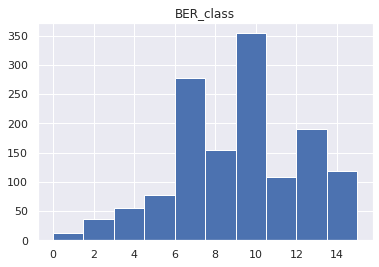

In [930]:
df_train.hist(column='BER_class')

**BER_class** looks slightly skewed but quite reasonable so we will not perform a transformation on it.  

The **Location** feature represents what is typically deemed to be of high priority for real estate. However this is represented more accurately by the **Longitude** and **Latitude** features so we will not include it.  

We will one-hot encode the **Type** categorical variable deeming it to be a nominal categorical variable although perhaps it could be argued that it is ordinal for the purpose of house prices.  

In [931]:
df_train.drop(['Location'], axis=1, inplace=True)

In [932]:
df_train = pd.get_dummies(df_train, drop_first=True, columns=['Type'])

In [933]:
df_train.head()

,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Surface,Price,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse
0,0.693147,0.693147,8.0,DNG are delighted to present to the market no....,None,53.396659,-6.438791,4.168214,195000,0,0,0,0,0,0,0,0,0
1,0.000000,0.693147,9.0,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,4.538710,425000,0,0,0,0,0,0,0,1,0
2,1.098612,1.098612,2.0,"Welcome to No. 6 Cotter Close, an immaculately...",Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,4.650144,535000,0,0,0,0,1,0,0,0,0
3,0.000000,1.098612,11.0,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,4.364372,499000,0,1,0,0,0,0,0,0,0
4,1.098612,1.386294,9.0,'Four Seasons' comes to the market as a wonder...,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,5.014627,510000,0,1,0,0,0,0,0,0,0


We now look for correlations between our response variable **Price** and possible explanatory variables using a heatmap of our reduced dataset.

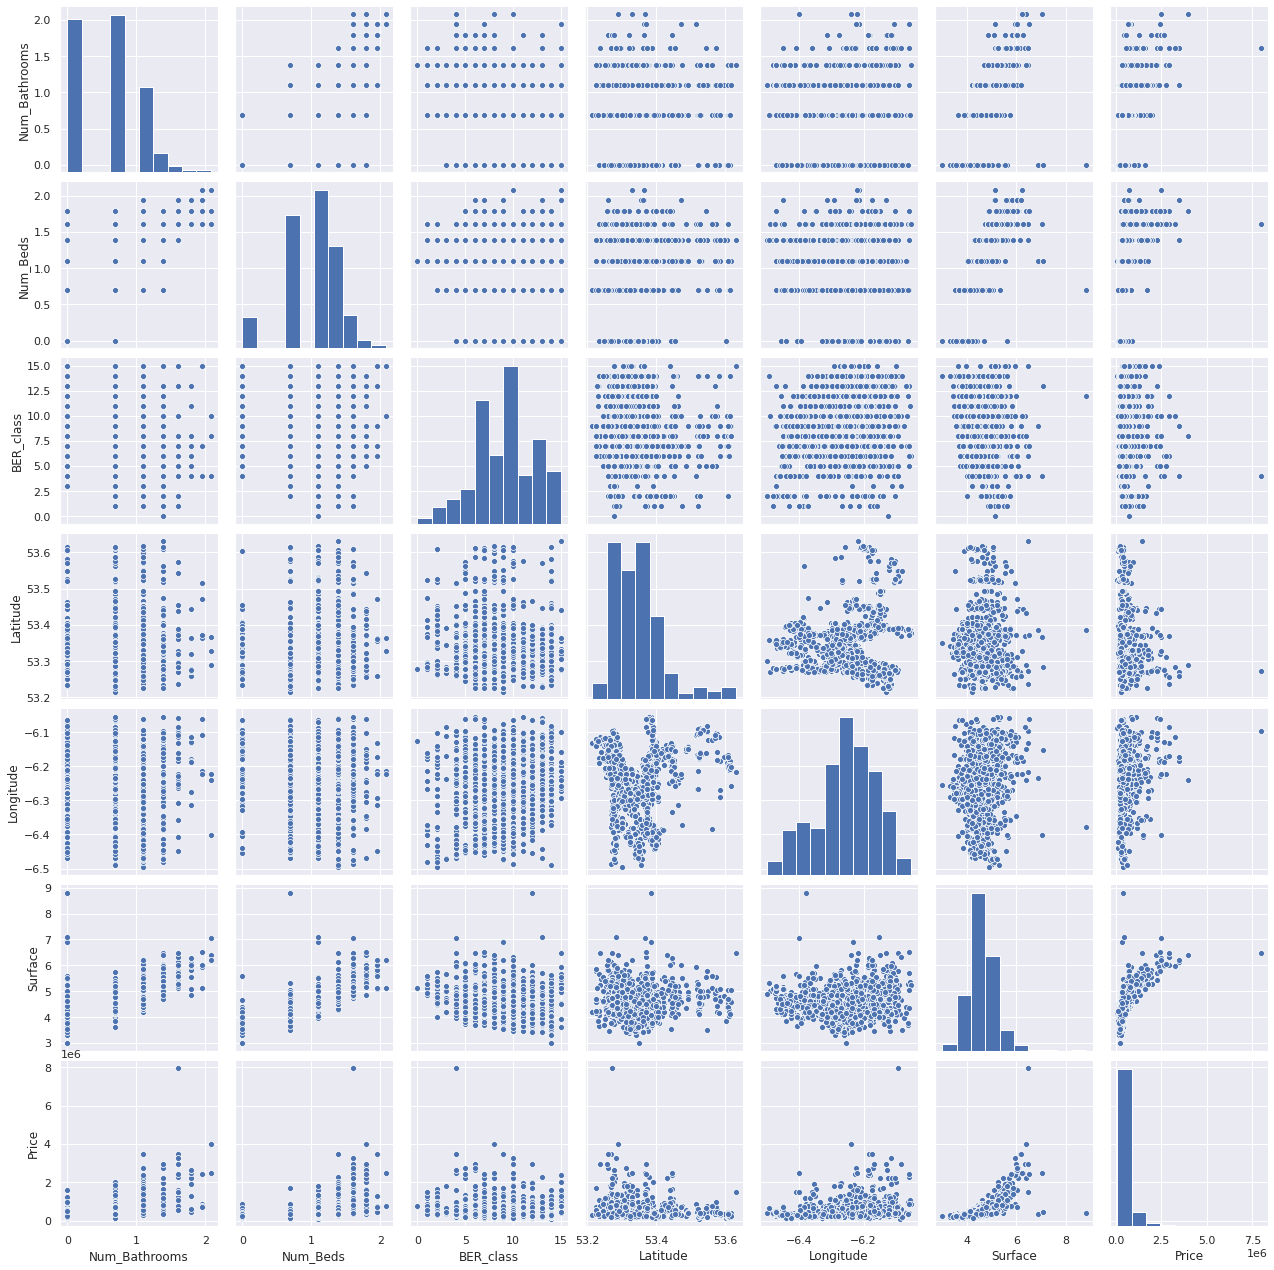

In [934]:
# Provide pairplot to show trends and correlations
sns.pairplot(data=df_train[numeric_attr].dropna())
plt.show()

<AxesSubplot:>

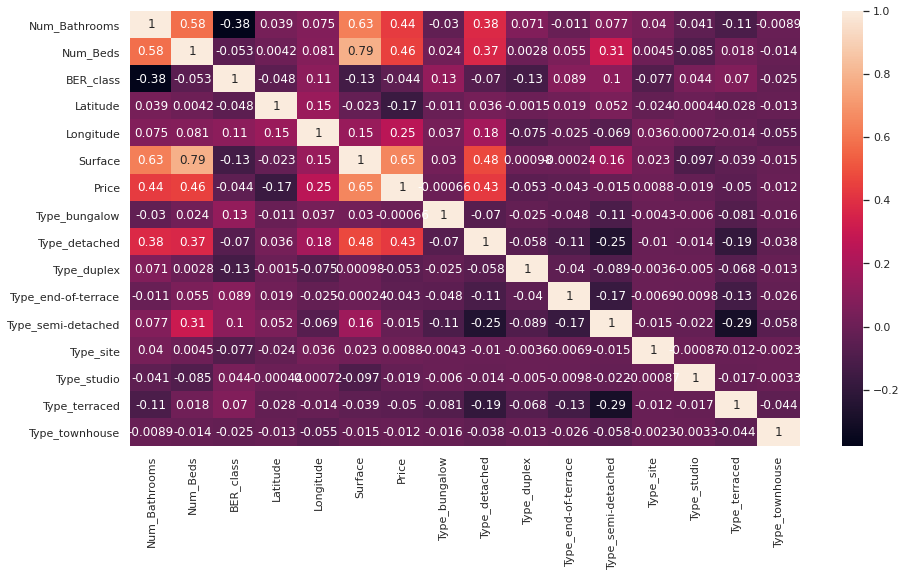

In [935]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_train.corr(), annot = True)

The most influential explanatory variables are **Surface**, **Num_Beds**, **Num_Bathrooms** and house type **Type_detatched** followed at a distance by **Longitude** and, with negative correlation, **Latitude**.

### Test dataset

We now load the test data and repeat the data cleaning we performed on the training dataset.

In [936]:
# Load and show first data frame rows 
df_test = pd.read_csv(testing_file)

In [937]:
df_test.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [938]:
# Generate descriptive statistics
df_test.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,1989.500000,1.231545e+07,2.027066,2.987179,53.350445,-6.252411,132.603530
std,202.794231,1.420680e+05,1.071273,1.198480,0.073961,0.091600,330.347066
min,1639.000000,1.147889e+07,1.000000,1.000000,53.214227,-6.521183,32.100000
25%,1814.250000,1.227637e+07,1.000000,2.000000,53.295225,-6.304258,73.000000
50%,1989.500000,1.237928e+07,2.000000,3.000000,53.341153,-6.247799,99.200000
75%,2164.750000,1.240421e+07,3.000000,4.000000,53.381752,-6.184277,136.875000
max,2340.000000,1.242824e+07,9.000000,14.000000,53.617443,-6.057150,8576.000000


We apply data cleaning as per the training data.

In [939]:
def house_price_test_data_feature_prep(df:pd.DataFrame) -> pd.DataFrame:
    """Perform preparation of features on the housing test dataset as
    previously performed on the training dataset.
    
    Args:
        df: Dataframe of test data to prepare
    Return:
        Prepared test dataframe
    """
    # Drop unnecessary columns
    df.drop(['ID', 'Index'], axis=1, inplace=True)
    
    # Drop 'Services' as was 60+% empty in training set
    df.drop(['Services'], axis=1, inplace=True)
    
    # Drop 'Location' as 'Latitude' and 'Longitude' will represent this
    df.drop(['Location'], axis=1, inplace=True)
    
    # Perform log transformation on following features
    lst = ['Num_Bathrooms', 'Num_Beds', 'Surface']
    for var in lst:
        var_min = df[var].min()
        df[var] = np.log(df[var]-var_min+1.0)
        
    # Ordinal mapping of 'BER_class'
    df.BER_class = df.BER_class.replace(BER_class_mapper)
    
    # One-hot encoding of house 'Type'
    df = pd.get_dummies(df, drop_first=True, columns=['Type'])
    
    return df

In [940]:
def write_kaggle_pred_data(pred:np.ndarray, filename:str, df:pd.DataFrame) -> None:
    """Write out the predicted data in format expected by Kaggle
    
    Args:
        pred: Numpy array of predicted data.
        filename: String filename to write to including directory if desired.
        df: Dataframe containing the Index column from Kaggle test set
    Returns
        None
    """
    pred_int = pred.astype(int)
    df_pred = pd.DataFrame({'Index':df['Index'], 'Price':pred_int})
    df_pred.to_csv(filename, index=False)

In [941]:
df_test_orig = df_test.copy()
df_test_prepd = house_price_test_data_feature_prep(df_test)

In [942]:
df_test_prepd.head

<bound method NDFrame.head of      Num_Bathrooms  Num_Beds  BER_class  \
0         0.693147  0.693147        7.0   
1         0.693147  1.609438       11.0   
2         0.000000  0.693147       14.0   
3         1.386294  1.386294        1.0   
4         0.693147  1.098612       13.0   
..             ...       ...        ...   
697       0.000000  0.000000       14.0   
698       0.000000  0.693147       10.0   
699       0.000000  1.098612        9.0   
700       0.693147  1.098612        NaN   
701       0.000000  1.098612       13.0   

                                           Description  \
0    OMD Estate Agents are delighted to present thi...   
1    Welcome to Saint Anthony No.214 Glasnevin Aven...   
2    Located in this ever popular road, on grounds ...   
3    DNG are delighted to represent the sale of thi...   
4    A unique opportunity to acquire this red brick...   
..                                                 ...   
697  Sherry FitzGerald is delighted to present 

---  
### Bayesian Linear Regression  
  
We'll perform regression with the features **Description** and **Feature** dropped for now.  

In [943]:
print(f"df_train shape:{df_train.shape}, df_test_prepd shape:{df_test_prepd.shape}")

df_train shape:(1633, 18), df_test_prepd shape:(702, 16)


In [944]:
df_train.head

<bound method NDFrame.head of       Num_Bathrooms  Num_Beds  BER_class  \
0          0.693147  0.693147        8.0   
1          0.000000  0.693147        9.0   
2          1.098612  1.098612        2.0   
3          0.000000  1.098612       11.0   
4          1.098612  1.386294        9.0   
...             ...       ...        ...   
1633       0.000000  0.693147        7.0   
1634       1.098612  1.609438        6.0   
1635       0.693147  1.098612        2.0   
1636       2.079442  2.079442       10.0   
1637       0.693147  0.693147       11.0   

                                            Description  \
0     DNG are delighted to present to the market no....   
1     13 Northbrook Terrace is a charming red brick ...   
2     Welcome to No. 6 Cotter Close, an immaculately...   
3     Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...   
4     'Four Seasons' comes to the market as a wonder...   
...                                                 ...   
1633  Built in c.1930 38 Str

The shapes are different between the prepared training and test sets in terms of features but on inspection we see that **Price** and **Type_studio** are not included in the test sets.  
  
From our analysis above we will train on the following features:  
**Surface**, **Num_Beds**, **Num_Bathrooms**, **Type_detatched**,**Longitude** and **Latitude**.

In [945]:
feature_set = ['Surface', 'Num_Beds', 'Num_Bathrooms', 'Type_detached', 'Longitude', 'Latitude']

X_train = df_train[feature_set]
X_test = df_test_prepd[feature_set]
y_train = df_train[['Price']]

**TODO**: potentially cross validation, but should split train dataset into train:validation to perform BLR below.

In [946]:
def generate_bayesian_lin_reg_model(
    alpha: dict={'mu':0, 'sigma':30},
    beta: dict={'mu':0, 'sigma':30},
    sigma: dict={'beta':5},
    iteration_cnt: int=40000,
    sample_cnt: int=5000,
    X: np.ndarray=None,
    y: np.ndarray=None
    ):
    """Generate a Bayesian linear regression model
    
    alpha, beta defined as normal distributions
    sigma defined as HalfCauchy distribution
    
    Args:
        alpha: dict containing mu and sigma values for alpha normal distribution
        beta: dict containing mu and sigma values for beta normal distribution
        sigma: dict containing sigma value for sigma HalfCauchy distribution
        iteration_cnt: int iteration count for bayesian linear reg. model fit
        sample_cnt: int sample count drawn from posterior
        X: np.ndarray of training data
        y: np.ndarray of labels

    Returns:
        Approximation for the model
        Posterior for the bayesian linear regression model
    """
    with pm.Model() as model:
        # prior over the parameters of linear regression
        _alpha = pm.Normal('alpha', mu=alpha['mu'], sigma=alpha['sigma'])
        # we have a beta for each column of Xn
        _beta = pm.Normal('beta', mu=beta['mu'], sigma=beta['sigma'], shape=X.shape[1])
        # prior over the variance of the noise
        _sigma = pm.HalfCauchy('sigma_n', beta=sigma['beta'])
        # linear regression relationship
        #linear regression model in matrix form
        _mu = _alpha + pm.math.dot(_beta, X.T)
        # likelihood 
        like = pm.Normal('like', mu=_mu, sigma=_sigma, observed=y[:,0])
  
    with model:
        # iterations of the algorithm
        approximation = pm.fit(iteration_cnt, method='advi')

    # samples from the posterior    
    posterior = approximation.sample(sample_cnt)
    return posterior, approximation

<AxesSubplot:title={'center':'House price histogram, training set'}, xlabel='Price', ylabel='Number of houses'>

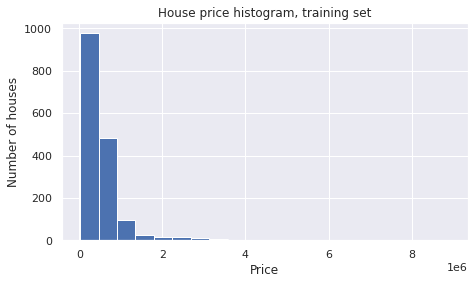

In [947]:
# Plot Price
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("House price histogram, training set")
ax1.set_xlabel('Price')
ax1.set_ylabel('Number of houses')
y_train['Price'].hist(bins=20)

As the house price is skewed we perform a transform on it.

In [948]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values

In [949]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([X_train,X_train[:,[0]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([X_test,X_test[:,[0]]**2])
Xn_test = xscaler.transform(Xss_test)

In [950]:
ylog = np.log(y_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

(array([  1.,   0.,   0.,   0.,   0.,   1.,  14., 143., 325., 380., 320.,
        213., 102.,  62.,  28.,  19.,  20.,   2.,   0.,   3.]),
 array([-5.21985731, -4.70566986, -4.19148241, -3.67729496, -3.16310751,
        -2.64892006, -2.13473261, -1.62054516, -1.1063577 , -0.59217025,
        -0.0779828 ,  0.43620465,  0.9503921 ,  1.46457955,  1.978767  ,
         2.49295445,  3.0071419 ,  3.52132936,  4.03551681,  4.54970426,
         5.06389171]),
 <BarContainer object of 20 artists>)

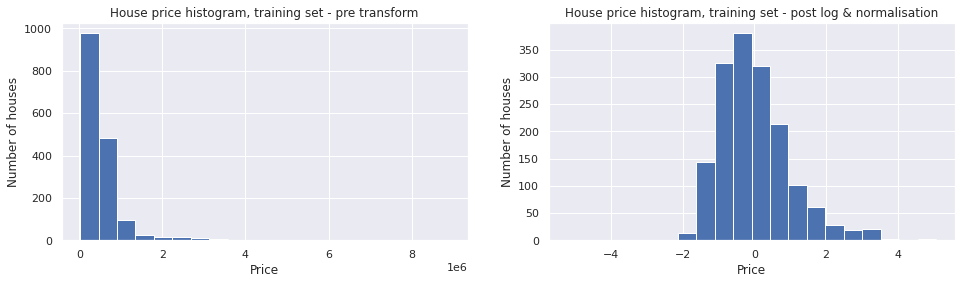

In [951]:
# Plot Price
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("House price histogram, training set - pre transform")
ax1.set_xlabel('Price')
ax1.set_ylabel('Number of houses')
ax1.hist(y_train, bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("House price histogram, training set - post log & normalisation")
ax3.set_xlabel('Price')
ax3.set_ylabel('Number of houses')
ax3.hist(yn_train, bins=20)

Finished [100%]: Average Loss = 1,294.2


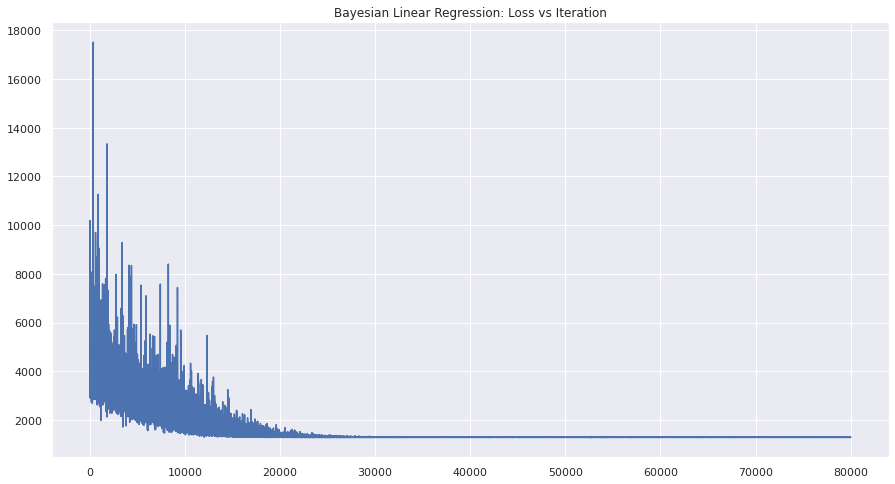

In [952]:
posterior, approximation = generate_bayesian_lin_reg_model(X=Xn_train, y=yn_train,
                                                           iteration_cnt=80000, sample_cnt=5000)
# check the convergence
plt.title('Bayesian Linear Regression: Loss vs Iteration')
plt.plot(approximation.hist);

---

We'll perform prediction on the test data.  

In [953]:
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]

(array([620.,  63.,   9.,   6.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   57720.44674446,   725783.24266935,  1393846.03859424,
         2061908.83451913,  2729971.63044402,  3398034.42636891,
         4066097.22229381,  4734160.0182187 ,  5402222.81414359,
         6070285.61006848,  6738348.40599337,  7406411.20191826,
         8074473.99784315,  8742536.79376804,  9410599.58969293,
        10078662.38561782, 10746725.18154271, 11414787.9774676 ,
        12082850.77339249, 12750913.56931738, 13418976.36524227]),
 <BarContainer object of 20 artists>)

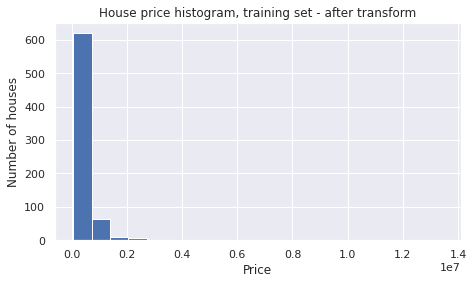

In [954]:
# Plot Price
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("House price histogram, training set - after transform")
ax1.set_xlabel('Price')
ax1.set_ylabel('Number of houses')
plt.hist(y_pred, bins=20)

In [955]:
write_kaggle_pred_data(pred=y_pred, filename="y_pred.csv", df=df_test_orig)

---  
### Piecewise Bayesian Linear Regression  
  

We'll perform regression with the features **Description** and **Feature** dropped for now.  

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

In [956]:
# Helper functions

def blr(
    posterior,
    yscaler,
    test,
    ):
    """Calculate BLR value
    
    Args:
        posterior: pymc3 MultiTrace, sampled data from posterior belief
        yscaler: StandardScaler
        test: np.ndarray, test data

    Return:
        BLR value
    """
    y_pred_blr = np.exp(yscaler.inverse_transform(np.mean(posterior['alpha']) 
              + np.dot(np.mean(posterior['beta'],axis=0), test.T)))
    return y_pred_blr

def mae(
    y_pred_blr,
    y_test
    ):
    """Calculate MAE value
    
    Args:
        y_pred_blr: blr value
        y_test: y values of test set
    Return:
        MAE value
    """
    mae = np.mean(abs(y_pred_blr - y_test))
    return mae

def mape(
    y_pred_blr,
    y_test
    ):
    """Calculate MAPE value
    
    Args:
        y_pred_blr: blr value
        y_test: y values of test set
    Return:
        MAPE value
    """
    mape = np.mean(abs(y_pred_blr - y_test) / y_test)
    return mape

In [957]:
def model_predict(
    posterior,
    X,
    nsamples,
    yscaler
    ):
    """Generate model predictions
    
    Args:
        posterior: pymc3 MultiTrace, sampled data from posterior belief
        X: np.ndarray, training data
        nsamples: int, number of samples to select from posterior
        yscaler: StandardScaler
    Return:
        Preditions
    """
    Ypred = yscaler.inverse_transform(ppc(posterior['alpha'], posterior['beta'], posterior['sigma_n'],
                                          X, nsamples=nsamples))
    return Ypred
    
def plot_model_pred_vs_observations(
    predictions=None,
    log_labels=None,
    title=None
    ):
    """Plot the model predictions against the actual observations
    
    Args:
        predictions: np.ndarray, model predictions
        log_labels: np.ndarray, log of y labels
    Return:
        None
    
    """
    for i in range(predictions.shape[0]):
        az.plot_dist(predictions[i,:], color='r', plot_kwargs={"linewidth": 0.2})
    az.plot_dist(predictions[i,:], color='r', plot_kwargs={"linewidth": 0.2}, label="prediction")
    az.plot_dist(log_labels, label='true observations');
    plt.legend()
    plt.xlabel("log(y) - output variable")
    plt.ylabel("density plot")
    plt.title(title, fontsize=20)

In [958]:
def prep_cluster_data(
    train_data: np.ndarray=None,
    test_data: np.ndarray=None,
    label_data: np.ndarray=None,
    clusters_train_labels: np.ndarray=None,
    clusters_test_labels: np.ndarray=None,
    idx: int=0
    ):
    """Return cluster specific training and test data from all clustered data.
       The training data has already been clustered and we wish to separate it
       into training data specific to a single cluster as defined by 'idx'
    
    Args:
        train_data: np.ndarray containing all clustered training data
        test_data: np.ndarray containing all clustered test data
        label_data: np.ndarray containing all label data
        clusters_train_labels: np.ndarray containing all cluster train labels (data belonging to which cluster)
        clusters_test_labels: np.ndarray containing all cluster tsst labels (data belonging to which cluster)
        idx: int index of which cluster to return
    Returns:
        np.ndarray: cluster specific training data
        np.ndarray: cluster specific test data
        np.ndarray: log of label data specific to cluster
        StandardScaler: scaler for label data
        np.ndarray: transformed log of label data
    """
    Xn = train_data[clusters_train_labels==idx,:]
    Xtestn = test_data[clusters_test_labels==idx,:]
    ylog = np.log(label_data.astype('float')[clusters_train_labels==idx,:])
    yscaler = StandardScaler().fit(ylog)
    yn = yscaler.transform(ylog)
    
    return Xn, Xtestn, ylog, yscaler, yn

In [959]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    """Generate posterior predictive checks for Bayesian Linear Regression model
    
    Args:
        alpha: posterior for alpha
        beta: posterior for beta
        sigma: posterior for sigma
        X: np.ndarray of data to predict upon
        nsamples: number of random samples to draw from eash posterior
    """
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

## Clustering

In [960]:
inertia = []
for k in range(1,15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    inertia.append(clustered_data_sklearn.inertia_)

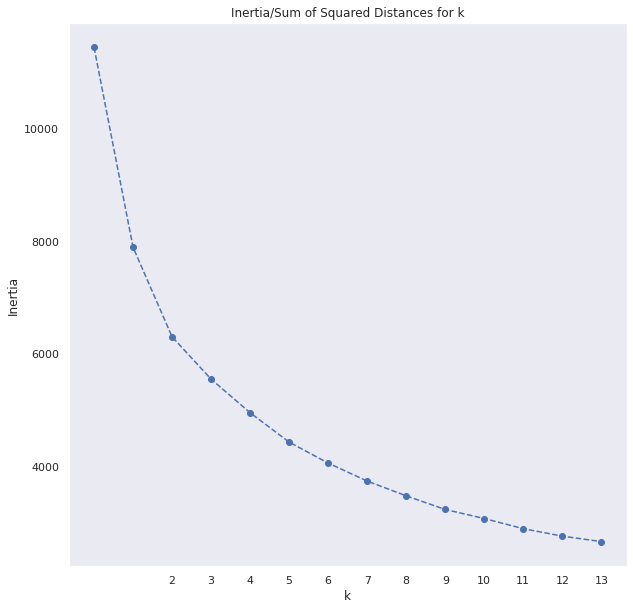

In [961]:
plt.figure(figsize=(10,10))
plt.title('Inertia/Sum of Squared Distances for k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.xticks(range(2, 30))
plt.grid()
plt.plot(inertia, linestyle='--', marker='o', color='b')

In [962]:
# As per website: https://realpython.com/k-means-clustering-python/#choosing-the-appropriate-number-of-clusters 
silhouette_coefficients = []
   
# Start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    score = silhouette_score(Xn_train, clustered_data_sklearn.labels_)
    silhouette_coefficients.append(score)

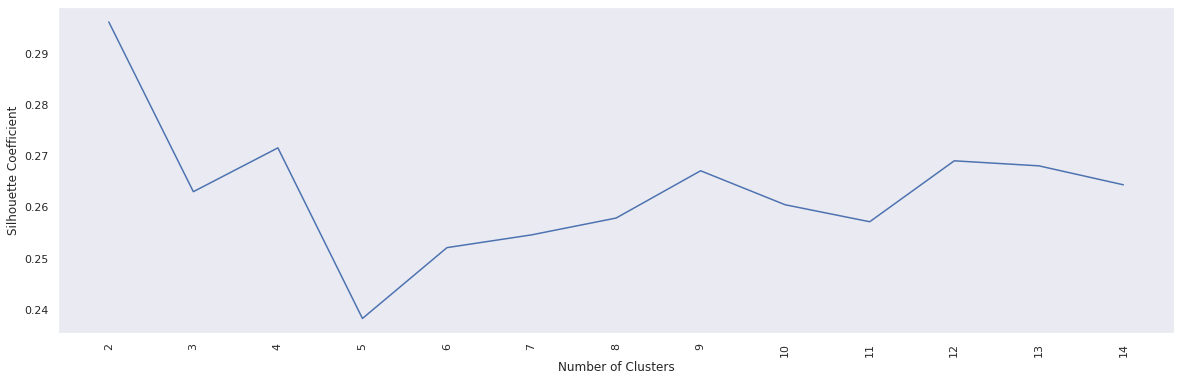

In [963]:
plt.figure(figsize=(20,6))
plt.plot(range(2,15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xticks(rotation=90)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show() 

In reviewing k-means for different number of clusters we see a knee point of approximately 4. This implies we should use 4 clusters.  

With the silhouette score (Rousseeuw, P. J.) we look for the maximum value and at which number of clusters it occurs. Here we see a maximum value occuring at 4 clusters.  
  
The silhouette method scoring function uses inter-cluster and intra-cluster distances. The elbow method only uses intra-cluster distances. This can explain the difference in suggested cluster number between the two methods.  

We will try 4 clusters given our results from elbow and silhouette methods.

We will trial clustering by GMM using discrete and continuous features (Solanki, G.). Previously we saw the features in order of importance were **beds**, **bathrooms**, **longitude** and **latitude**.  
**beds** and **bathrooms** are discrete numbered features whereas **longitude** and **latitude** are continuous.

In [964]:
print(f"feature set:{feature_set}")

feature set:['Surface', 'Num_Beds', 'Num_Bathrooms', 'Type_detached', 'Longitude', 'Latitude']


Text(0.5, 1.0, 'GMM clustering, 4x clusters')

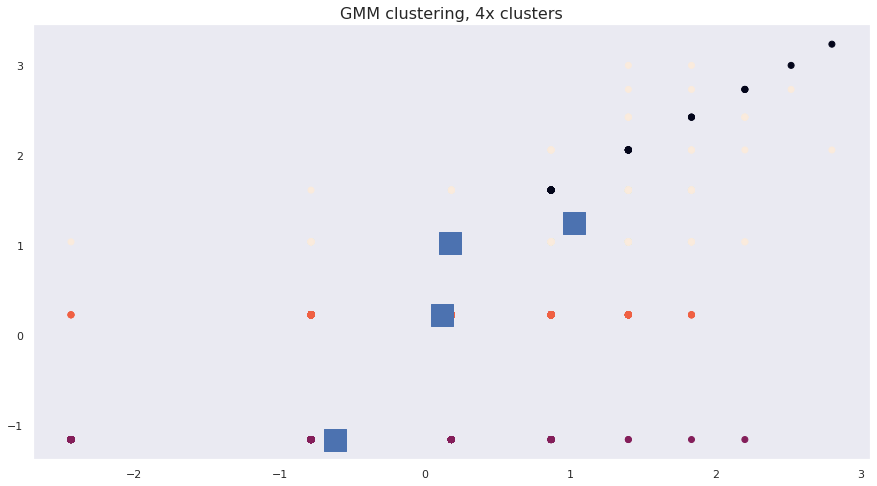

In [965]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)

# clustering by features Num_Beds, Num_Bathrooms 
ind=[1, 2]
X_ind = Xn_train[:, ind]

# Gaussian Mixture
gmm.fit(X_ind)
plt.grid()

# Predict the training data so we can label the dots
labels = gmm.predict(X_ind)
plt.scatter(X_ind[:,0],X_ind[:,1], c=labels)

# centroids
plt.scatter(gmm.means_[:,0],gmm.means_[:,1], marker="s", s=22**2)
plt.title('GMM clustering, 4x clusters', fontsize=16)

We now trial clustering on continuous data. We choose **longitude** and **latitude** of our list of most influential variables.

Text(0.5, 1.0, 'GMM clustering by "latitude" and "longitude", 4 x clusters')

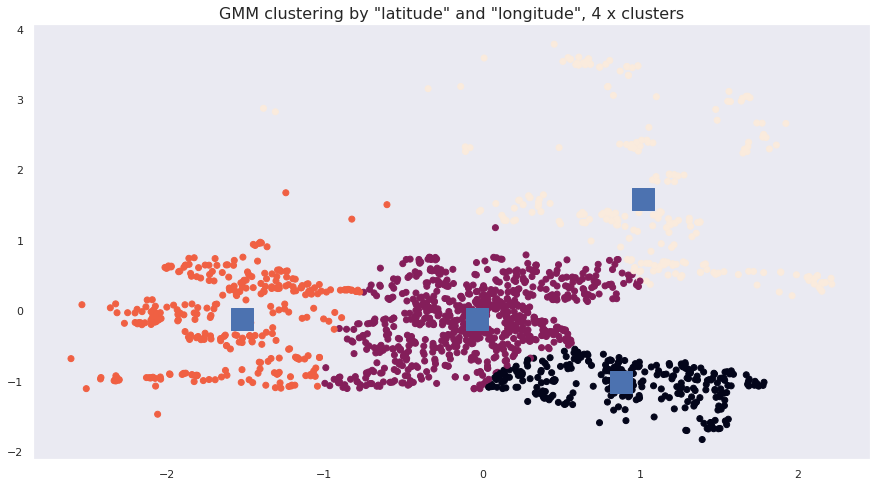

In [966]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)

# clustering by features surface, latitude and longitude 
ind=[4, 5]
X_ind = Xn_train[:,ind]

# Gaussian Mixture
gmm.fit(X_ind)
plt.grid()

# Predict the training data so we can label the dots
labels = gmm.predict(X_ind)
plt.scatter(X_ind[:,0],X_ind[:,1], c=labels)

# centroids
plt.scatter(gmm.means_[:,0],gmm.means_[:,1], marker="s", s=22**2)
plt.title('GMM clustering by "latitude" and "longitude", 4 x clusters', fontsize=16)

This clustering looks reasonable visually with perhaps some outliers still present given a small number of isolated points.

In [967]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 292, 1: 772, 2: 313, 3: 256}

In [968]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 129, 1: 347, 2: 117, 3: 109}

In [969]:
Xn0, Xtestn0, ylog0, yscaler0, yn0 = prep_cluster_data(
    Xn_train, Xn_test, y_train, clusters_train, clusters_test, 0)

In [970]:
Xn1, Xtestn1, ylog1, yscaler1, yn1 = prep_cluster_data(
    Xn_train, Xn_test, y_train, clusters_train, clusters_test, 1)

In [971]:
Xn2, Xtestn2, ylog2, yscaler2, yn2 = prep_cluster_data(
    Xn_train, Xn_test, y_train, clusters_train, clusters_test, 2)

In [972]:
Xn3, Xtestn3, ylog3, yscaler3, yn3 = prep_cluster_data(
    Xn_train, Xn_test, y_train, clusters_train, clusters_test, 3)

In [973]:
posterior0, _ = generate_bayesian_lin_reg_model(X=Xn0, y=yn0)

Finished [100%]: Average Loss = 232.64


In [974]:
posterior1, _ = generate_bayesian_lin_reg_model(X=Xn1, y=yn1)

Finished [100%]: Average Loss = 590.18


In [975]:
posterior2, _ = generate_bayesian_lin_reg_model(X=Xn2, y=yn2)

Finished [100%]: Average Loss = 261.18


In [976]:
posterior3, _ = generate_bayesian_lin_reg_model(X=Xn3, y=yn3)

Finished [100%]: Average Loss = 205.53


### Only Cluster 0

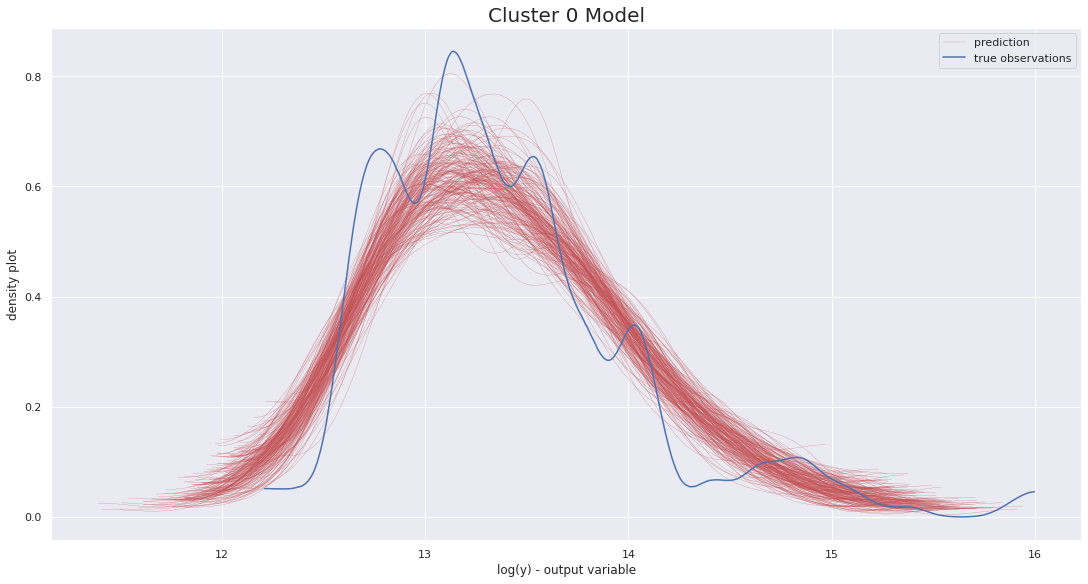

In [977]:
Ypred0 = model_predict(posterior0, Xn0, 200, yscaler0)
plot_model_pred_vs_observations(Ypred0, ylog0, "Cluster 0 Model")

### Only Cluster 1

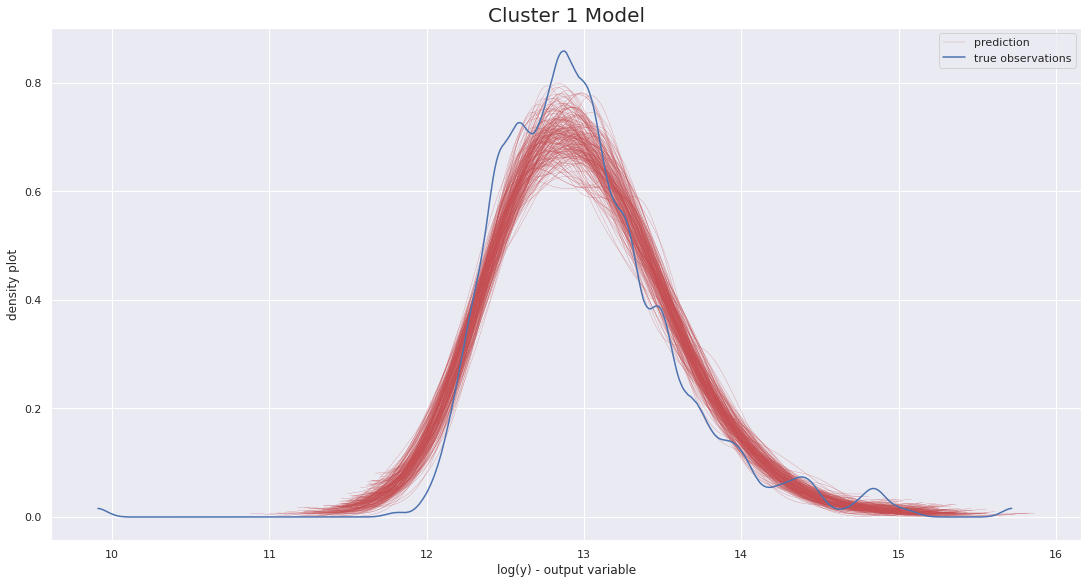

In [978]:
Ypred1 = model_predict(posterior1, Xn1, 200, yscaler1)
plot_model_pred_vs_observations(Ypred1, ylog1, "Cluster 1 Model")

### Only Cluster 2

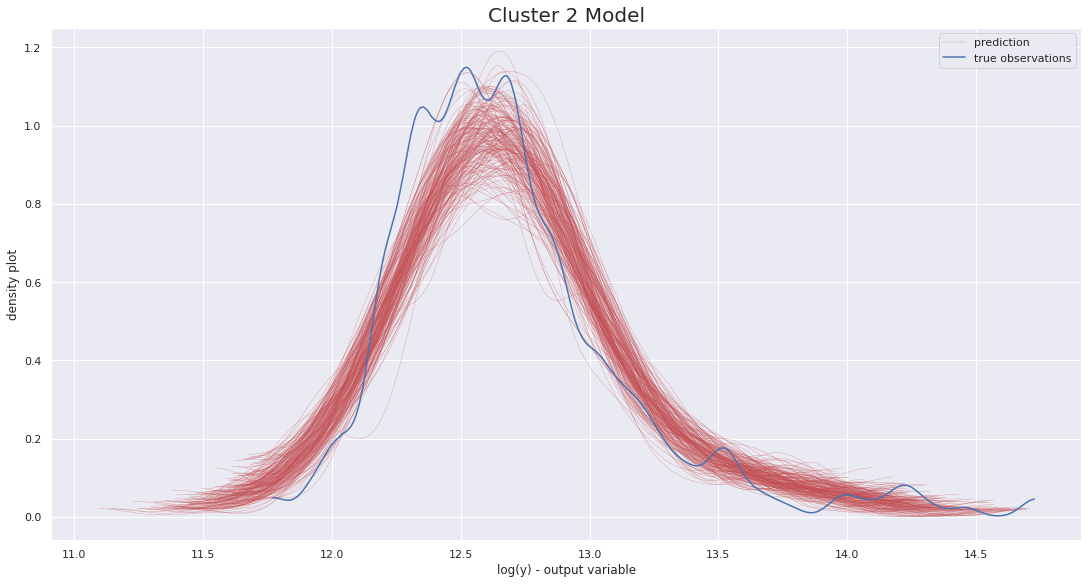

In [979]:
Ypred2 = model_predict(posterior2, Xn2, 200, yscaler2)
plot_model_pred_vs_observations(Ypred2, ylog2, "Cluster 2 Model")

### Only Cluster 3

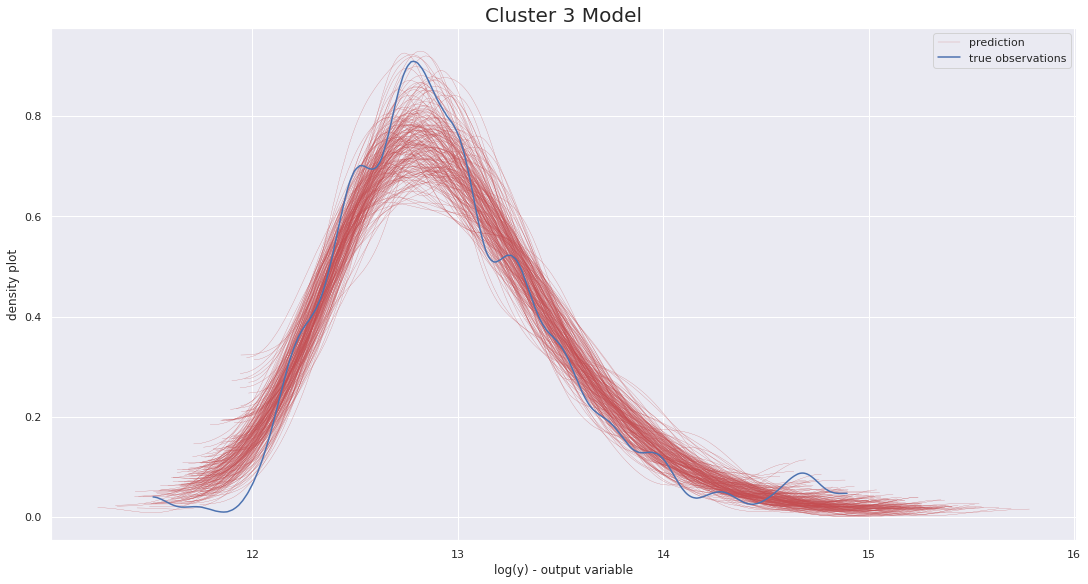

In [980]:
Ypred3 = model_predict(posterior3, Xn3, 200, yscaler3)
plot_model_pred_vs_observations(Ypred3, ylog3, "Cluster 3 Model")

## Overall

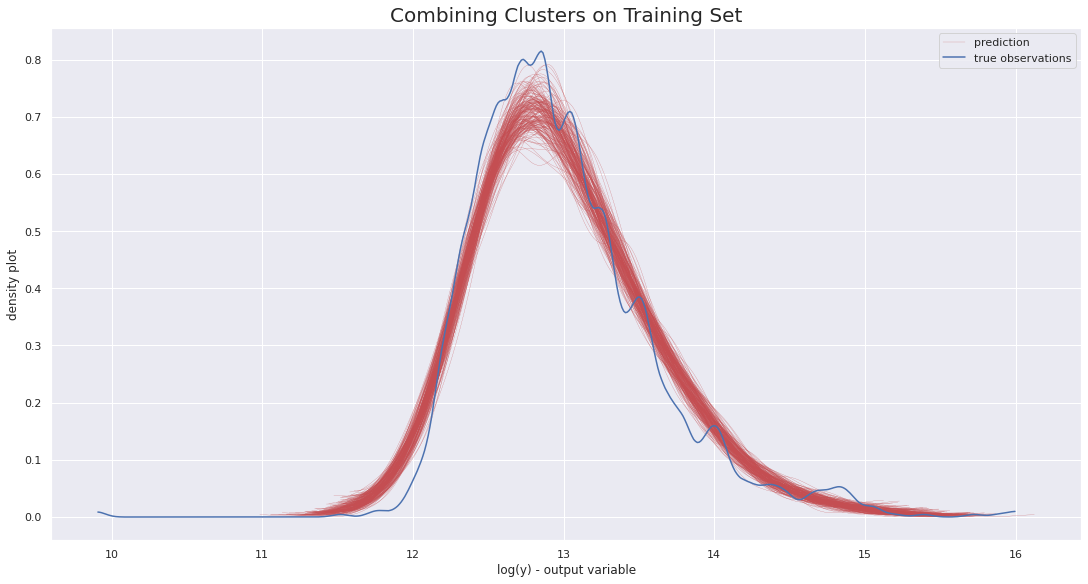

In [981]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])
ylog=np.vstack([ylog0, ylog1, ylog2, ylog3])

plot_model_pred_vs_observations(Ypred, ylog, "Combining Clusters on Training Set")

---  
### Kaggle Test Data  

We'll run our Kaggle test data individually through the GMM to choose the cluster and then through the appropriate piecewise model to obtain the prediction while keeping track of the appropriate test data **Index**. Note that we're predicting the cluster just on the GMM features fitted, i.e. **Longitude** and **Latitude**.

In [982]:
index_lst = df_test_orig.Index.values
print(f"index_lst:{type(index_lst)}")

index_lst:<class 'numpy.ndarray'>


In [983]:
# Select longitude & latitude features
ind=[4, 5]
X_ind = Xn_test[:,ind]
cluster_labels = gmm.predict(X_ind)

# Iterate through appropriate models
y_test = []
for label, Xn_test_datum in zip(cluster_labels, Xn_test):
    # Model predict expects a numpy array of test samples to predict upon.
    #  Place our single test sample (itself a numpy array of "features" size) into a numpy array
    Xn_test_datum_arr = Xn_test_datum.reshape(1, Xn_test_datum.shape[0])
    if label == 0:
        y_test.append(np.exp(model_predict(posterior0, Xn_test_datum_arr, 1000, yscaler0))[0][0])
    elif label == 1:
        y_test.append(np.exp(model_predict(posterior1, Xn_test_datum_arr, 1000, yscaler1))[0][0])
    elif label == 2:
        y_test.append(np.exp(model_predict(posterior2, Xn_test_datum_arr, 1000, yscaler2))[0][0])
    elif label == 3:
        y_test.append(np.exp(model_predict(posterior3, Xn_test_datum_arr, 1000, yscaler3))[0][0])
    else:
        print(f"Error: unclustered data with label:{label}")

In [984]:
print(f"Number of elements in y_test:{len(y_test)}")
print(f"y_test[:20]:{y_test[:20]}\n")

Number of elements in y_test:702
y_test[:20]:[255763.40788602724, 318005.6518218005, 396514.90696073114, 563984.0060417962, 274701.05353348714, 128266.20459660383, 187615.53473837965, 371166.2611406534, 817342.7251137489, 1321679.715258271, 241304.83812180045, 322443.57953831577, 202705.20603013216, 661359.807117187, 327417.7902246009, 173719.929117979, 517569.2235110539, 267462.6200003716, 293533.3859090714, 487624.37548829446]



In [986]:
y_test_np = np.asarray(y_test)

In [987]:
write_kaggle_pred_data(pred=y_test_np, filename="y_pred_piecewise_BLR.csv", df=df_test_orig)

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

We'll use pretrained word embeddings with regression to predict house prices from the **description** field of our dataset.  
  
Text is a highly unstructured form of data with various types of noise present. For this reason we perform **Text Preprocessing** to clean it. We perform:  
- Noise removal  
  - Removal of stopwords, e.g. "is", "am", "the", etc.
- Lexicon normalization  
  - Stemming: stripping of suffixes such as "ing", "ly", etc.  
  - Lemmatization: use of vocabulary, word structure and grammar relations to obtain the root of the word.  
- Object Standardization  
  - Removal of words or phrases which are not in standard lexical dictionaries such as acronyms, hashtags and colloquial slang.

---
First we'll read in our corpus and remove stopwords. Then we'll view it.  
Given that the **Features** field, while very promising in it's definition, is not present in 64% of entries we will ignore it.    

In [43]:
df_train.Description

0       DNG are delighted to present to the market no....
1       13 Northbrook Terrace is a charming red brick ...
2       Welcome to No. 6 Cotter Close, an immaculately...
3       Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...
4       'Four Seasons' comes to the market as a wonder...
                              ...                        
1633    Built in c.1930 38 Stradbrook Road is a deligh...
1634    An impressive three-story family home superbly...
1635    DNG Lucan's leading estate agents are delighte...
1636    Holyrood Castle is a most distinctive 19th cen...
1637    A superb opportunity awaits to acquire this be...
Name: Description, Length: 1633, dtype: object

In [45]:
# Stop words are basically a set of commonly used words in any language
# https://en.wikipedia.org/wiki/Stop_word
# and are filtered out before processing of natural language data 
# Example list: https://github.com/igorbrigadir/stopwords/blob/master/en/terrier.txt
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jim/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [66]:
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
nltk.download('punkt')
nltk.download('wordnet')

def NLP_preprocess(text):
    """
    Normalization using NLTK and spaCy
    """
    # Remove numbers
    text_no_numbers = re.sub('[^a-zA-Z]', ' ', text)

    # Remove standalone letters (running multiple times as cannot find python equivalent of regex global)
    for i in range(10):
        text_no_numbers = re.sub('\s.\s', ' ', text_no_numbers)

    # Tokenization
    NLP_token = word_tokenize(text_no_numbers)
    
    # Stemming
    PS = PorterStemmer()
    NLP_stem = []
    for word in NLP_token:
        NLP_stem.append(PS.stem(word))

    # Lemmatization
    WL = WordNetLemmatizer()
    NLP_lemma = []
    for word in NLP_stem:
        NLP_lemma.append(WL.lemmatize(word))
  
    # Stopword   
    FS = []  
    NLP_stop = set(stopwords.words("english"))
    for w in NLP_lemma:  
        if w not in NLP_stop:  
            FS.append(w)
  
    # Punctuation  
    punctuations = "?:!.,;"
    for word in FS:
        if word in punctuations:
            FS.remove(word)
    
    return FS

[nltk_data] Downloading package punkt to /home/jim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [67]:
preprocessed_text = NLP_preprocess(df_train.Description[0])
print(f"{'-'*10} Prior to Text Preprocessing:{'-'*10}\n{df_train.Description[0]}\n")
print(f"{'-'*10} Post Text Preprocessing:{'-'*10}\n{preprocessed_text}\n")

---------- Prior to Text Preprocessing:----------
DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. 

This well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.

Chipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.

Viewing comes highly r

Perform preprocessing for **Description** field of training dataset.

In [74]:
# Clean all description rows and add "clean" columm
df_train.Description_clean = df_train.Description.apply(lambda x : NLP_preprocess(x))

In [78]:
# de-tokenization - joining the words and adding detokenized column
df_train.Description_detoken = df_train.Description_clean.apply(lambda x : ' '.join(x))

We'll view the dominant content of the descriptions through a word cloud.

In [91]:
def plot_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

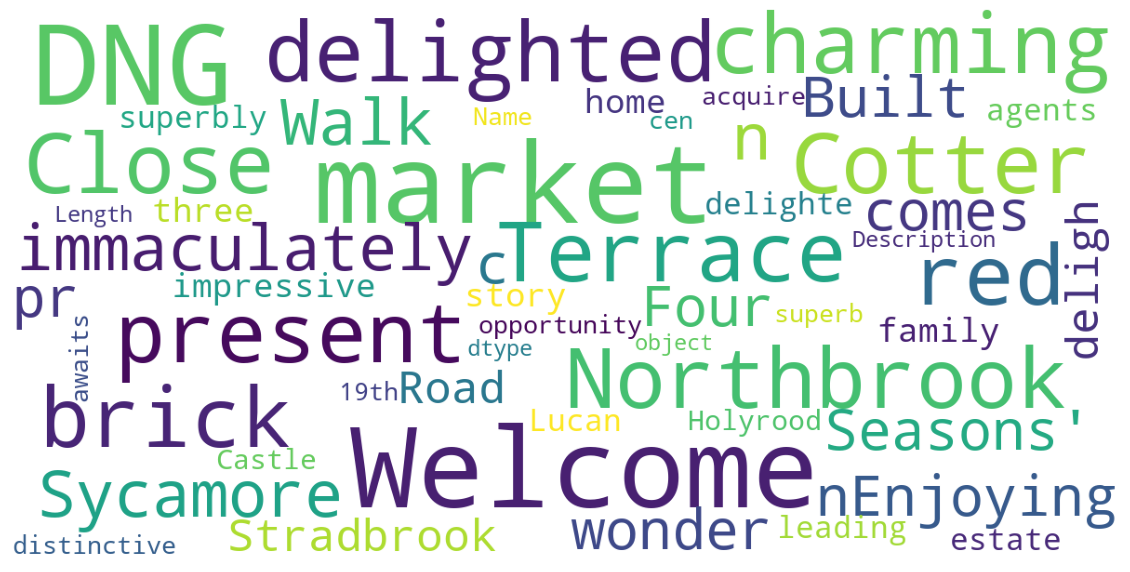

In [92]:
# print wordcloud
plot_wordcloud(df_train.Description)

Initially this word cloud has presented the names of the estate agents as being prominant. We may later remove these if we are not benefitting from their inclusion.

We're going to use a pretrained embedding model to produce the embedding vector representation of our documents which are our **Description** feature. Models we consider are `word2vec` (Mikolov T., 2013) and `GloVe` (Pennington J. ).  
`word2vec` is produced and patented by Google and pretrained models are available which used datasets such as "Google News" containing about 100 billions words. This results in a model of size 1.6GB.  
`GloVe` is from Standford University and is available as pretrained models of varying sizes. We select `glove-wiki-gigaword-200` having been trained on a corpus consisting of Wikipedia 2014 and Gigaword 5 and available from Standford which results in 200 dimensional vector word embeddings (GloVe Standford). This has been trained on 6 billion tokens and 400,000 words. It is contained in a 662MB file `glove.6B.100d.txt`.     

In [104]:
# we need to convert from GloVe to word2vec file format to use with gensim
glove_input_file = 'data/glove/glove.6B.200d.txt'
word2vec_glove_file = 'data/glove/glove.6B.200d.txt.word2vec'

# if the file already exists then don't recreate it (time consuming!)
if not os.path.isfile(word2vec_glove_file):
    glove2word2vec(glove_input_file, word2vec_glove_file)

In [106]:
# Load the GloVe model
model = KeyedVectors.load_word2vec_format(word2vec_glove_file, binary=False)

In [113]:
print(f"Word vector dimension size:{model.vector_size}\nWord embedding of 'house':\n{model['house']}")

Word vector dimension size:200
Word embedding of 'house':
[ 4.7641e-01 -5.6269e-04  4.9202e-02 -7.3879e-01  3.7132e-02 -1.2158e-01
 -4.6408e-02  2.3389e-01  8.8552e-02  2.3504e-01  4.9984e-01 -2.5752e-02
  8.6279e-01 -5.6084e-01 -1.5898e-02  3.8606e-01 -4.0744e-01 -7.8242e-02
 -4.9744e-01  2.3597e-01 -2.5095e-01  2.5800e+00  2.3732e-01 -1.3906e-01
  3.2639e-01 -3.9747e-01 -7.6958e-02 -2.7866e-01  4.1035e-01  2.3829e-01
 -4.1175e-02 -6.7140e-01  4.4805e-01  1.9617e-01 -5.8027e-01  1.7948e-01
 -9.3515e-02 -3.6991e-01  8.2635e-01  1.7027e-01 -1.0140e-01  5.4630e-02
 -1.8867e-01  5.2122e-01 -1.5975e-01  1.3666e-01  5.4290e-01  1.9361e-01
 -9.2103e-02  5.6441e-01  1.4980e-02  1.5426e-01  4.4921e-01  2.5681e-01
 -3.7364e-02 -4.5421e-02  1.8183e-01 -1.2785e-01 -2.4702e-01  3.6216e-01
  5.0130e-01  2.7318e-01  1.0898e-01 -2.7041e-01  3.7572e-01 -7.0259e-01
 -9.0682e-01 -1.8616e-01 -4.0091e-02  4.0526e-01  3.8018e-01 -4.5428e-01
 -4.8367e-01  3.3373e-01  3.5684e-01  4.9874e-01 -7.3453e-01 -2.94

As a quick test we'll perform regression against the averaged word embeddings of the documents although we might have better performance by passing the documents through a CNN or similar.

In [152]:
def generate_document_vector(doc: list = None) -> np.ndarray:
    """Generate a document vector by taking the average of the word embeddings of the document.
    """
    doc_words_in_vocab = []
    sum_docs = np.ndarray(shape=200)
    for word in doc:
        try:
            # Check word exists (Gensim4.0)
            model.key_to_index[word]
        except:
            pass
        else:
            doc_words_in_vocab.append(model[word])
            sum_docs += model[word]
   
    return sum_docs/200.

In [154]:
generate_document_vector(df_train.Description_clean[0])

doc_words:[ 1.40801103e-001  2.06340131e-002  3.13829494e-002 -2.13171312e-002
  3.80798561e-002 -2.75503852e-002              nan -1.09978847e-001
 -1.21457834e-001  2.94141492e-002  5.26460497e-002 -2.52250451e-002
  2.13713907e-001              nan  6.83183584e-002              nan
 -1.12999830e-001 -1.24927390e-003  1.00208767e-001  8.06275892e-002
 -1.76230226e-002  1.16084791e+000  1.34497363e-001 -1.33238466e-001
  1.01516537e-001 -1.04057049e-001  1.63870365e+177 -6.53527461e-002
 -9.34711062e-003 -1.04289642e-001 -1.51664433e-002 -9.32019090e-002
  1.40724387e-002  2.40566509e-002 -1.47067387e-002 -3.51642651e-002
 -5.56456260e-002 -1.21175615e-001  1.32332576e-001  1.07854912e-002
 -5.55587800e-002  5.84917378e-002 -5.67536644e-002  1.63926301e-001
 -5.86557160e-002  1.39557881e-001  2.82676420e-001 -1.34077608e-001
 -3.67534845e-002  1.52869809e-001 -2.47901992e-002  1.31354377e-001
  2.88152113e-002  1.71916717e-001  1.12188522e-001 -1.85568828e-002
 -1.42318219e-002  3.266

array([ 1.40801103e-001,  2.06340131e-002,  3.13829494e-002,
       -2.13171312e-002,  3.80798561e-002, -2.75503852e-002,
                    nan, -1.09978847e-001, -1.21457834e-001,
        2.94141492e-002,  5.26460497e-002, -2.52250451e-002,
        2.13713907e-001,              nan,  6.83183584e-002,
                    nan, -1.12999830e-001, -1.24927390e-003,
        1.00208767e-001,  8.06275892e-002, -1.76230226e-002,
        1.16084791e+000,  1.34497363e-001, -1.33238466e-001,
        1.01516537e-001, -1.04057049e-001,  1.63870365e+177,
       -6.53527461e-002, -9.34711062e-003, -1.04289642e-001,
       -1.51664433e-002, -9.32019090e-002,  1.40724387e-002,
        2.40566509e-002, -1.47067387e-002, -3.51642651e-002,
       -5.56456260e-002, -1.21175615e-001,  1.32332576e-001,
        1.07854912e-002, -5.55587800e-002,  5.84917378e-002,
       -5.67536644e-002,  1.63926301e-001, -5.86557160e-002,
        1.39557881e-001,  2.82676420e-001, -1.34077608e-001,
       -3.67534845e-002,

## TODO:
- Could use VotingClassifier from sklearn to combine models.  
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

# SUMMARY

Your summary here.

# References

Bansal S. (2017), Analytics Vidhya, Ultimate Guide to Understand and Implement Natural Language Processing, available at:
https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/?utm_source=blog&utm_medium=top_5_sentence_embedding Accessed 11/Oct/21

Joshi Y. (2020), Analytics Vidhya, Steps for effective text data cleaning, available at: https://www.analyticsvidhya.com/blog/2014/11/text-data-cleaning-steps-python/ Accessed 11/Oct/21

Bansai S. (2014), Analytics Vidhya, A Quick Guide to Text Cleaning Using the nltk Library, available at: https://www.analyticsvidhya.com/blog/2020/11/text-cleaning-nltk-library/, Accessed 11/Oct/21

Chambliss C. (2019), TowardsDataScience, Using word2vec to Analyze News Headlines and Predict Article Success, https://towardsdatascience.com/using-word2vec-to-analyze-news-headlines-and-predict-article-success-cdeda5f14751, Accessed 11/Oct/21

Mikolov T. (2013) Efficient Estimation of Word Representations in Vector Space

Pennington J. (), GloVe: Global Vectors for Word Representation  

GloVe Standford pretrained word vectors: https://nlp.stanford.edu/projects/glove/

Brownlee J. (2020), How to Develop Word Embeddings in Python with Gensim, available at: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/ Accessed 11/Oct/21